In [2]:
import warnings
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
from google.cloud.bigquery import magics
from shapely import wkt
import mplleaflet
from IPython.core.interactiveshell import InteractiveShell
from shapely.geometry import Polygon, Point
from IPython.display import Image, IFrame
from descartes import PolygonPatch
from pyproj import Proj, transform
import plotly.graph_objects as go
InteractiveShell.ast_node_interactivity = "all" # enables multiple cell
warnings.filterwarnings('ignore')
magics.context.project = 'kolumbus-timemachine'
%reload_ext google.cloud.bigquery

# Vi legger til en dimensjon – analyse av kartinformasjon i Python
Foredrag på regionssamling Bouvet Rogaland, høsten 2019<br/>
Ture Friese, avdeling Skynety

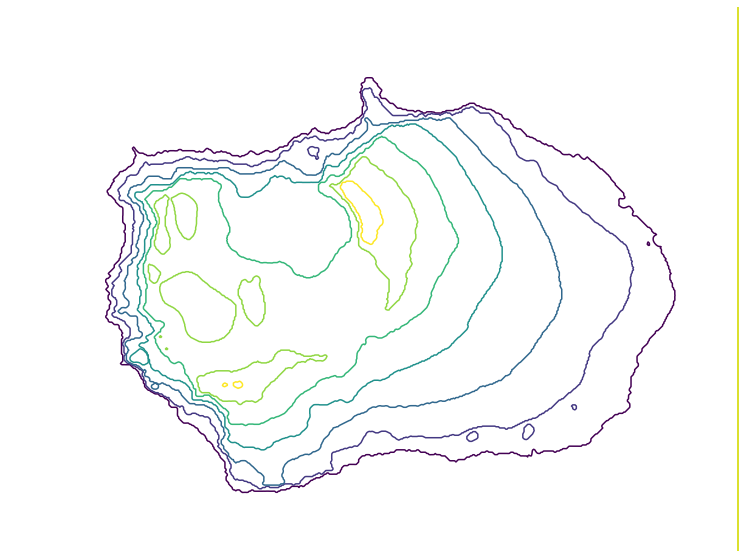

In [48]:
#data from https://geodata.npolar.no
topography = gdal.Open('NP_B0_DTM20/B0_DTM20.tif')
data_array = topography.ReadAsArray().astype(np.float)
data_array = np.flip(np.flip(data_array), 1) #flip map the right way...
fig = plt.figure(figsize = [15, 10])
plt.contour(data_array, levels = list(range(100, 800, 100)))
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off');
#Inspired by https://www.earthdatascience.org/tutorials/visualize-digital-elevation-model-contours-matplotlib/

***
***
***
## Om meg

- hjemmebyen er Worms i Tyskland
- utdannelse: Sivilingeniør industriell økonomi og endringsledelse
- 10 år som systemutvikler og forretningsutvikler i finans i Oslo
- jobber som data scientist i avdeling Skynet siden juni 2019<p/>

- kontakt: ture.friese@bouvet.no, mobil 99230426

In [3]:
fig = go.Figure()
fig = fig.add_trace(go.Scattergeo(
    lat=[49.63, 49, 59.92, 58.916505],
    lon=[8.36, 8.40, 10.77, 5.732801],
    marker={
        "color": ["MidnightBlue", "IndianRed", "MediumPurple", "Orange"],
        "line": {"width": 1},
        "size": 10},
    mode="markers+text",
    text=['Worms', 'Karlsruhe', 'Oslo', 'Stavanger'],
    textfont={
        "color": ["MidnightBlue", "IndianRed", "MediumPurple", "Gold"],
        "family": ["Arial, sans-serif", "Balto, sans-serif", "Courier New, monospace", "Droid Sans, sans-serif"],
        "size": [22, 21, 20, 19]},
    textposition=["top center", "middle left", "top center", "bottom center"],
));
fig = fig.update_layout(
    height=500,
    geo=go.layout.Geo(
        lataxis=dict(range=[47, 61]),
        lonaxis=dict(range=[-6, 18]),
        scope="europe",
    ),
    margin=go.layout.Margin(l=0, r=0, b=0, t=0),
);
display(fig)

***
***
***

### Vi begynner med en titt på et typisk BI verktøy<p/>

Google BigQuery GeoViz tool:<br/>
https://bigquerygeoviz.appspot.com<p/>

Query that we want to visualize:

In [5]:
%%bigquery stations

SELECT st_geogPoint(longitude, latitude) as WKT, num_bikes_available
FROM `bigquery-public-data.new_york.citibike_stations`
WHERE num_bikes_available > 30

Vi legger til 
- stil **fillColor**: #0000FF
- stil **fillOpacity**: .5
- stil **circleRadius**: data-driven, field num_bikes_available, 30-60, 5-200<p/>

Hentet fra artikkel...<br/>
*Getting started with BigQuery GIS*<br/>
https://cloud.google.com/bigquery/docs/gis-getting-started<br/>

Observasjoner:
- begrenset i funksjonalitet
- point&click (and prey...)

***
***
***

### Hva hvis du vil gjøre mer? 
- tegne fyllingsgrad som stolpe?
- legge til flere lag med data, befolkningstetthet, kjøreruter, trafikk
- bruke geografi som dimensjon i maskinlæring?

Da kan vi gå over til python...

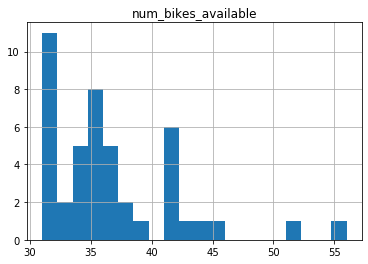

In [39]:
stations.hist(bins=20);

La oss plotte data på kart.<br/>

In [6]:
stations_gdf = gpd.GeoDataFrame(data=stations, geometry=stations.WKT.apply(wkt.loads))
stations_gdf.plot(figsize=[13,7])

mplleaflet.display()

***
***
***

### 3 Python-bilbioteker for plotting av kart

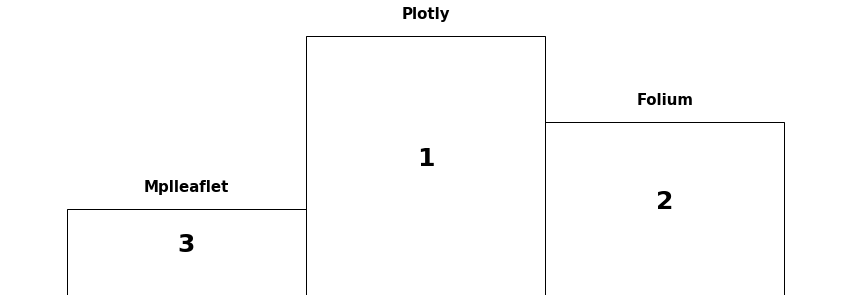

In [95]:
df = pd.DataFrame([{'rankk': 1},{'rankk': 3},{'rankk': 2}])
ax = df.plot.bar(y='rankk', legend=False, width=1, fill=False, figsize=[15, 5])

ax.text(0, 1.2, 'Mplleaflet', horizontalalignment='center', fontweight='bold', fontsize=15);
ax.text(1, 3.2, 'Plotly', horizontalalignment='center', fontweight='bold', fontsize=15);
ax.text(2, 2.2, 'Folium', horizontalalignment='center', fontweight='bold', fontsize=15);

ax.text(0, 0.5, '3', horizontalalignment='center', fontweight='bold', fontsize=25);
ax.text(1, 1.5, '1', horizontalalignment='center', fontweight='bold', fontsize=25);
ax.text(2, 1, '2', horizontalalignment='center', fontweight='bold', fontsize=25);

plt.axis('off');

- **Mplleaflet** er raskt og enkelt<br/>
    mer info på hjemmesiden:<br/>
    https://github.com/jwass/mplleaflet<p/>

- **Folium** er bra for heatmaps, colorpleths og interaktive kart<br/>
    github-side:<br/>
    https://github.com/python-visualization/folium<br/>
    I Alexis Cook "*Interactive Maps*" tutorial på Kaggle.com finner vi noen eksempler for heatmap og colorpleth:<br/>
    https://www.kaggle.com/alexisbcook/interactive-maps<br/>
    Her finner man og kildekoden og forklaringen hvordan man gjør.<p/>

- **Plotly**, omfangrik, relativt enkelt å programmere, mest oppdatert<br/>
Hjemmeside:<br/>
https://plot.ly/python/plotly-express/<p/>

Ikke bruk **Basemap** 🙁

Et eksemple med Plotly:
    


In [7]:
import plotly.express as px
px.set_mapbox_access_token('pk.eyJ1IjoidHVyZS1ib3V2ZXQiLCJhIjoiY2p6OGplam5mMDBrYTNsbXAxbXN6cXN5eiJ9.4cgv_exGN_5449H-Tc2gZQ')

carshare = px.data.carshare()
fig = px.line_mapbox(carshare, lat="centroid_lat", lon="centroid_lon", color="peak_hour", zoom=11);
fig.show()

(hentet fra: https://plot.ly/python/plotly-express/#scatter-and-line-plots)

#### Mer kart eksempler på plotly hjemmeside:

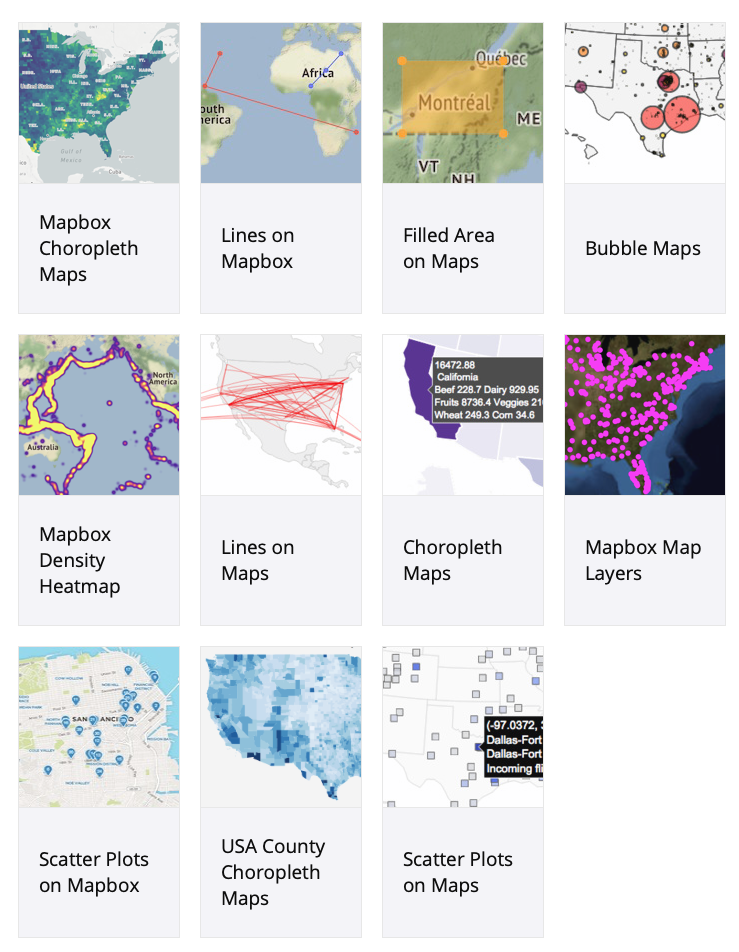

In [154]:
Image('/Users/ture.friese/Documents/workspace/data_paa_kaart/plotly_maps.png', width=400)

Ref. https://plot.ly/python/maps/#maps

***
***
***
## De viktigste biblioteker for kartdata i Python

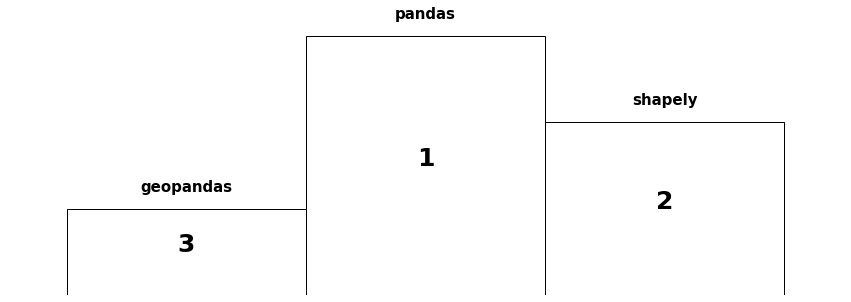

In [196]:
df = pd.DataFrame([{'rankk': 1},{'rankk': 3},{'rankk': 2}])
ax = df.plot.bar(y='rankk', legend=False, width=1, fill=False, figsize=[15, 5])

ax.text(0, 1.2, 'geopandas', horizontalalignment='center', fontweight='bold', fontsize=15);
ax.text(1, 3.2, 'pandas', horizontalalignment='center', fontweight='bold', fontsize=15);
ax.text(2, 2.2, 'shapely', horizontalalignment='center', fontweight='bold', fontsize=15);

ax.text(0, 0.5, '3', horizontalalignment='center', fontweight='bold', fontsize=25);
ax.text(1, 1.5, '1', horizontalalignment='center', fontweight='bold', fontsize=25);
ax.text(2, 1, '2', horizontalalignment='center', fontweight='bold', fontsize=25);

plt.axis('off');



***
***
***
### Pandas – hjørnesteins bibliotek for Data Science
- DataFrame er den sentrale datastrukturer
- Tenk Excel i program-minne !
- ref. https://pandas.pydata.org

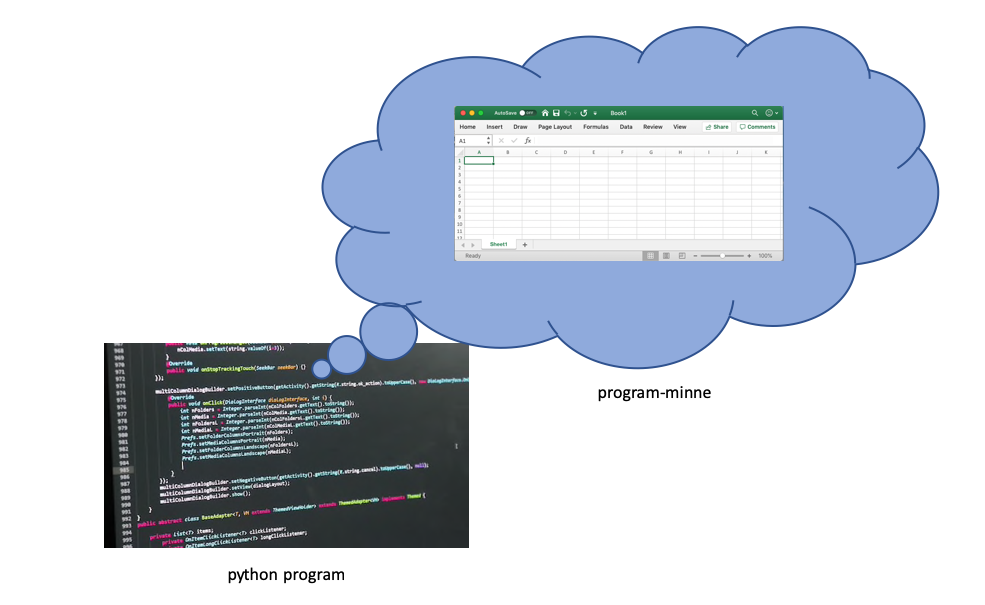

In [80]:
Image(filename="/Users/ture.friese/Documents/workspace/data_paa_kaart/steinbrudd.png")

***
***
***

### Pandas – sveisterkniv for tabell-data i Python

In [119]:
Image(url="https://partsolutions.com/wp-content/uploads/2014/01/Worlds_largest_Swiss_Army_knife_wenger_giant_knife.jpg")

In [110]:
print('Methods of pandas:\n\n', [entry for entry in dir(pd) if entry[0].islower()])
print('\n\nMethods of DataFrame:\n\n', [entry for entry in dir(pd.DataFrame) if entry[0].islower()])

Methods of pandas:

 ['api', 'array', 'arrays', 'bdate_range', 'compat', 'concat', 'core', 'crosstab', 'cut', 'date_range', 'datetime', 'describe_option', 'errors', 'eval', 'factorize', 'get_dummies', 'get_option', 'infer_freq', 'interval_range', 'io', 'isna', 'isnull', 'lreshape', 'melt', 'merge', 'merge_asof', 'merge_ordered', 'notna', 'notnull', 'np', 'offsets', 'option_context', 'options', 'pandas', 'period_range', 'pivot', 'pivot_table', 'plotting', 'qcut', 'read_clipboard', 'read_csv', 'read_excel', 'read_feather', 'read_fwf', 'read_gbq', 'read_hdf', 'read_html', 'read_json', 'read_msgpack', 'read_parquet', 'read_pickle', 'read_sas', 'read_spss', 'read_sql', 'read_sql_query', 'read_sql_table', 'read_stata', 'read_table', 'reset_option', 'set_eng_float_format', 'set_option', 'show_versions', 'test', 'testing', 'timedelta_range', 'to_datetime', 'to_msgpack', 'to_numeric', 'to_pickle', 'to_timedelta', 'tseries', 'unique', 'util', 'value_counts', 'wide_to_long']


Methods of DataFram

#### Noen kode eksempler:

In [9]:
type(stations)

stations.head()

stations.shape
stations.columns.values.tolist()


pandas.core.frame.DataFrame

WKT  num_bikes_available  \
0  POINT(-73.95600096 40.71774592)                   31   
1   POINT(-73.94755757 40.7903051)                   35   
2  POINT(-73.97109243 40.76350532)                   33   
3   POINT(-73.99063168 40.6867443)                   35   
4      POINT(-73.956461 40.813358)                   39   

                     geometry  
0  POINT (-73.95600 40.71775)  
1  POINT (-73.94756 40.79031)  
2  POINT (-73.97109 40.76351)  
3  POINT (-73.99063 40.68674)  
4  POINT (-73.95646 40.81336)

(45, 3)

['WKT', 'num_bikes_available', 'geometry']


***
***
***
### Shapely
- Jobbe med geometri-objekter som Point, LineString og Poligon
- Les mer her:<br/>
    https://shapely.readthedocs.io/en/stable/manual.html

In [10]:
from shapely.geometry import Polygon, Point

station4 = Point(-73.956461, 40.813358)
station5 = Point(-73.998102, 40.729170)
lower_manhatten = Polygon([(-73.990533, 40.706828), (-74.024183, 40.696029), (-74.016628, 40.745226), (-73.966480, 40.726082), (-73.975078, 40.710597),]) 

station4.within(lower_manhatten)

station5.within(lower_manhatten)

False

True

Stemmer det? La oss se på kart.

In [11]:
plt.figure().gca().add_patch(PolygonPatch(lower_manhatten, fc='#cc00cc', alpha=0.5 ))
plt.plot(station4.coords[0][0], station4.coords[0][1], 'rs')
plt.plot(station5.coords[0][0], station5.coords[0][1], 'gs')

mplleaflet.display()


***
***
***
### Geopandas
- utvidelse av Pandas DataFrame med en geografisk dimensjon, dvs. kolonne
- tillater shaply operasjoner på hele DataFrame
- mer info:<br/>
    http://geopandas.org

In [44]:
%%bigquery boro

SELECT *
FROM `bigquery-public-data.new_york_subway.geo_nyc_borough_boundaries`

Noen kodeeksepler:

In [45]:
import geopandas as gpd

boroughs = gpd.GeoDataFrame(data=boro, geometry=boro.borough_geom.apply(wkt.loads))

type(boroughs)

boroughs

geopandas.geodataframe.GeoDataFrame

borough_code   borough_name  borough_area    borough_len  \
0            2          Bronx  1.186612e+09  462958.188213   
1            5  Staten Island  1.623756e+09  325960.634597   
2            4         Queens  3.045885e+09  904390.137335   
3            1      Manhattan  6.366027e+08  361212.479734   
4            3       Brooklyn  1.937593e+09  738745.835869   

                                        borough_geom  \
0  MULTIPOLYGON(((-73.8888514849633 40.7987063289...   
1  MULTIPOLYGON(((-74.0531403682111 40.5777027155...   
2  MULTIPOLYGON(((-73.8099705940606 40.6000675373...   
3  MULTIPOLYGON(((-73.9213375241928 40.8008521075...   
4  MULTIPOLYGON(((-73.9199006427004 40.5996005225...   

                                            geometry  
0  MULTIPOLYGON (((-73.88885 40.79871, -73.88884 ...  
1  MULTIPOLYGON (((-74.05314 40.57770, -74.05293 ...  
2  MULTIPOLYGON (((-73.80997 40.60007, -73.81001 ...  
3  MULTIPOLYGON (((-73.92134 40.80085, -73.92191 ...  
4  MULTIPOLYGON (((-73.91990 40.59960, -73.91990 ...

***
***
***

### Inner join, left outer join, cross join, natural join...<br/> har du hørt om **sjoin**?<p/>

Spacial join med geopandas:

In [46]:
result = gpd.sjoin(stations_gdf, boroughs, how='inner', op='intersects')

result

WKT  num_bikes_available  \
0       POINT(-73.95600096 40.71774592)                   31   
3        POINT(-73.99063168 40.6867443)                   35   
7       POINT(-73.98631746 40.69236178)                   37   
40          POINT(-73.981013 40.689888)                   31   
1        POINT(-73.94755757 40.7903051)                   35   
2       POINT(-73.97109243 40.76350532)                   33   
4           POINT(-73.956461 40.813358)                   39   
5       POINT(-73.99810231 40.72917025)                   34   
6         POINT(-73.9471673 40.7839636)                   38   
8        POINT(-73.97371465 40.7643971)                   52   
9        POINT(-73.97402311 40.7597108)                   33   
10  POINT(-73.9524292946 40.7894854155)                   32   
11       POINT(-74.00838676 40.7037992)                   35   
12      POINT(-73.96905301 40.75001986)                   35   
14      POINT(-73.99906065 40.73047747)                   32   
15      POINT(-73.99200509 40.73492695)                   31   
16      POINT(-74.00566443 40.72243797)                   41   
17      POINT(-73.99238967 40.73726186)                   42   
18  POINT(-73.9780591428 40.7572456791)                   34   
19      POINT(-73.97648516 40.75992262)                   34   
20       POINT(-73.98683077 40.7451677)                   41   
21      POINT(-73.97207836 40.75714758)                   45   
22      POINT(-74.00247214 40.71939226)                   32   
23        POINT(-73.9607082 40.8067581)                   37   
24      POINT(-74.00612572 40.70530954)                   32   
25      POINT(-73.98014437 40.75500254)                   35   
26          POINT(-74.007756 40.746745)                   41   
27         POINT(-73.977112 40.7867947)                   56   
28  POINT(-73.9960098267 40.7243052725)                   32   
29          POINT(-73.971518 40.766368)                   38   
30      POINT(-73.98602213 40.74096374)                   43   
31      POINT(-73.97634151 40.76590936)                   37   
32  POINT(-73.9891862869 40.7428687731)                   44   
33      POINT(-74.00277668 40.76087502)                   37   
34      POINT(-73.99456405 40.73971301)                   31   
35   POINT(-73.9845272899 40.760683271)                   35   
36         POINT(-73.9635556 40.793393)                   31   
37      POINT(-73.98336183 40.76228826)                   36   
38   POINT(-73.990752697 40.7295149622)                   41   
39      POINT(-73.95818491 40.76500525)                   42   
41  POINT(-73.9686539769 40.7589965596)                   35   
42      POINT(-73.98316936 40.75527307)                   34   
43      POINT(-73.97498696 40.75510267)                   34   
44      POINT(-73.99009296 40.73704984)                   35   
13             POINT(-73.9521 40.74966)                   31   

                      geometry  index_right borough_code borough_name  \
0   POINT (-73.95600 40.71775)            4            3     Brooklyn   
3   POINT (-73.99063 40.68674)            4            3     Brooklyn   
7   POINT (-73.98632 40.69236)            4            3     Brooklyn   
40  POINT (-73.98101 40.68989)            4            3     Brooklyn   
1   POINT (-73.94756 40.79031)            3            1    Manhattan   
2   POINT (-73.97109 40.76351)            3            1    Manhattan   
4   POINT (-73.95646 40.81336)            3            1    Manhattan   
5   POINT (-73.99810 40.72917)            3            1    Manhattan   
6   POINT (-73.94717 40.78396)            3            1    Manhattan   
8   POINT (-73.97371 40.76440)            3            1    Manhattan   
9   POINT (-73.97402 40.75971)            3            1    Manhattan   
10  POINT (-73.95243 40.78949)            3            1    Manhattan   
11  POINT (-74.00839 40.70380)            3            1    Manhattan   
12  POINT (-73.96905 40.75002)            3            1    Manhattan

In [136]:
boro

borough_code   borough_name  borough_area    borough_len  \
0            2          Bronx  1.186612e+09  462958.188213   
1            5  Staten Island  1.623756e+09  325960.634597   
2            4         Queens  3.045885e+09  904390.137335   
3            1      Manhattan  6.366027e+08  361212.479734   
4            3       Brooklyn  1.937593e+09  738745.835869   

                                        borough_geom  
0  MULTIPOLYGON(((-73.8888514849633 40.7987063289...  
1  MULTIPOLYGON(((-74.0531403682111 40.5777027155...  
2  MULTIPOLYGON(((-73.8099705940606 40.6000675373...  
3  MULTIPOLYGON(((-73.9213375241928 40.8008521075...  
4  MULTIPOLYGON(((-73.9199006427004 40.5996005225...

***
***
***

### GeoPython konferanse
- årlig python konferanse i Basel/sveits
- hovedtema: geo-data, visulaisering machine learning
- ref. http://www.geopython.net
- agenda: https://submit.geopython.net/geopython2019/talk/

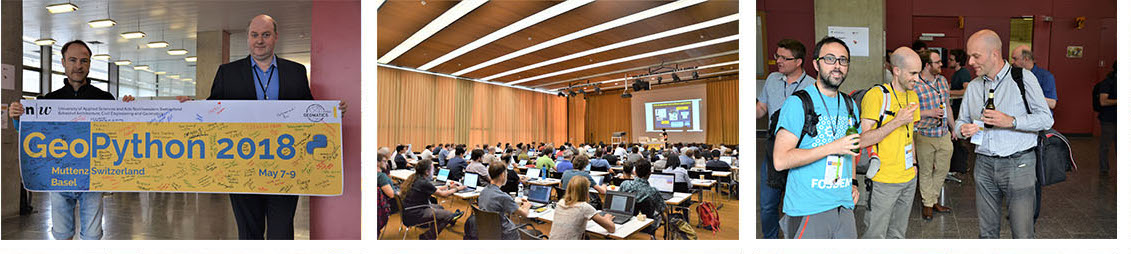

In [155]:
Image('/Users/ture.friese/Documents/workspace/data_paa_kaart/geopython2018.jpg')

#### 2 fordrag fra GeoPython 2019:

- *PyViz for Mapping Global Shipping*<br/>
    summary: http://2019.geopython.net/geopython2019/talk/8WK7GT/<br/>
    code: https://github.com/UKHO/geopython2019/<br/>
    desverre ingen video fra foredraget<br/>

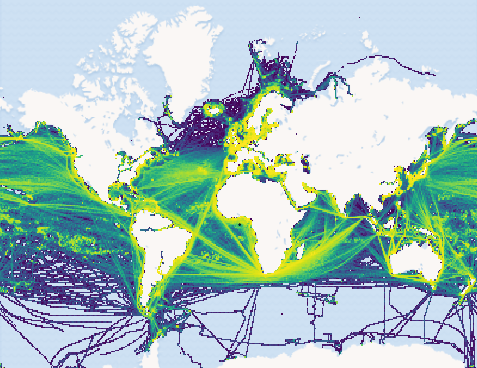

In [177]:
#Frame('https://www.shipmap.org', width=1000, height=800)
Image('/Users/ture.friese/Documents/workspace/data_paa_kaart/PyViz_for_Mapping_GlobalShipping.png')

- *Wikidata - a new source for geospatial data*<br/>
    https://k-nut.eu/static/Geopython-Wikidata.pdf<br/>
    -> kan brukes for geo-coding


In [12]:
IFrame('https://query.wikidata.org/#SELECT%20%3Fswiss_city%20%3Fswiss_cityLabel%0AWHERE%20%0A%7B%0A%20%20%3Fswiss_city%20wdt%3AP31%20wd%3AQ54935504%20.%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%20%7D%0A%7D', width=700, height=500)

#### En fordrag å trekke fram fra GeoPython 2018:
- *Spatial Data Science with PyData*<br/>
    https://github.com/ljwolf/geopython<br/>
    spesielt interessat hotspot/coldspot analyse som beskrevet i dette notebook:<br/>
    https://github.com/geopandas/scipy2018-geospatial-data/blob/master/06-exploratory-spatial-data-analysis.ipynb

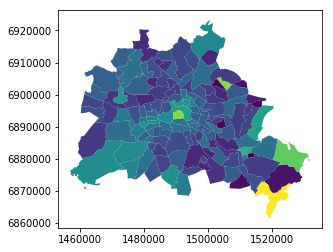

In [184]:
Image('/Users/ture.friese/Documents/workspace/data_paa_kaart/berlin_districts.png')

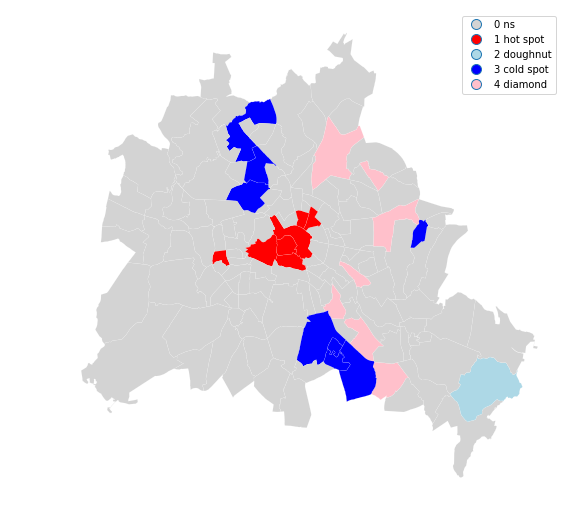

In [200]:
Image('/Users/ture.friese/Documents/workspace/data_paa_kaart/hotspot_coldspot.png', width='350')

### Geobinning

- Rund av koordinatene slik at alle punkter faller på et raster
- Slå long/lat samme til en kolonne

Kondeeksemplet:

In [169]:
import pandas as pd

df = pd.DataFrame(columns=['lon','lat'])

df['geobin'] = (
                  round(df['lon'] / 9, 2) * 9 * 100 * 10000
                + round(df['lat'] / 4.5, 2) * 4.5 * 100
    
               ).astype(int)

### Geo-clustering

- Grupperer punkter på kart i "cluster" med punkter som er nærliggende
- For clustering bruker man gjerne k-means og dbscan algorithmene fra skearn biblioteket<br/>
    Les mer her:<br/>
    https://scikit-learn.org/stable/modules/clustering.html<p/>
- God artikkel i forhold til **geo**-clustering:<br/>
    *Clustering on New York City Bike Dataset*<br/>
    https://chih-ling-hsu.github.io/2018/01/02/clustering-python

In [124]:
Image(url='http://www.sthda.com/sthda/RDoc/figure/clustering/dbscan-density-based-clustering-dbscan-factoextra-ggplot2-real-data-1.png', width=400)

Her er det et eksempel fra bysykkel prosjektet for Kolumbus som vi jobber med:

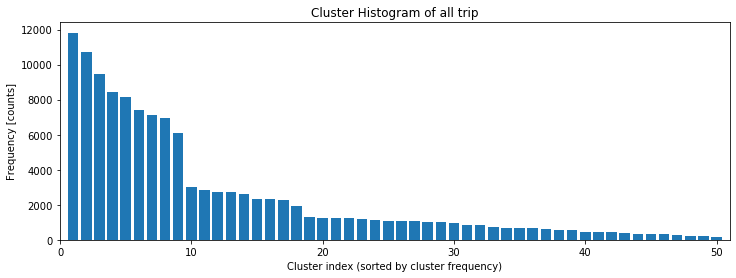

In [116]:
Image('/Users/ture.friese/Documents/workspace/data_paa_kaart/cluster_histogram_for_bysykkel_data.png')

Visualisering av cluster:

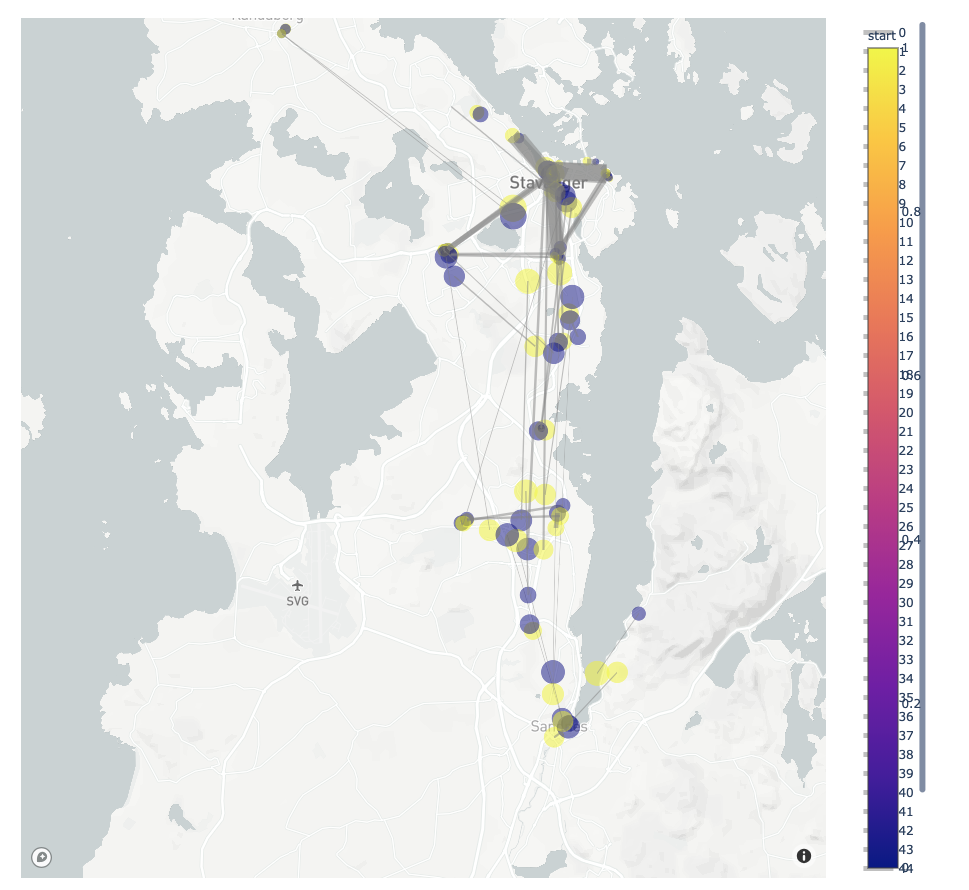

In [202]:
Image('/Users/ture.friese/Documents/workspace/data_paa_kaart/visualisering_av_trip_cluster.png', width=600)

### Tidsmaskin prosjekt i Kolumbus

In [13]:
IFrame('https://www.kolumbus.no/ruter/kart/sanntidskart/?c=58.978529,5.725808,14&lf=1,5&vt=bus,ferry', width=700, height=350)

***
***
***

# Takk for oppmerksomheten!
<p/>
<p/>